#### Import Packages

In [68]:
import pandas as pd
import numpy as np
from tableone import TableOne, load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#### Import Data

In [69]:
df = pd.read_excel('SeniorDataAnalystChallenge2.xlsx', sheet_name = 1)

#### Overview of the data

In [70]:
df.head(10)

,order delivery time,order id,customer order rating,type of issue reported,region,Unnamed: 5
0,2014-06-02 04:23:16 UTC,233599337,5,NaN,chi,NaN
1,2014-06-02 03:57:50 UTC,233599376,5,NaN,chi,NaN
2,2014-06-02 02:52:38 UTC,233599328,5,NaN,chi,NaN
3,2014-06-02 02:52:04 UTC,233599070,5,NaN,chi,NaN
4,2014-06-02 02:41:43 UTC,233599100,5,NaN,chi,NaN
5,2014-06-02 02:21:17 UTC,233599256,5,NaN,chi,NaN
6,2014-06-02 02:19:38 UTC,233599234,5,NaN,chi,NaN
7,2014-06-02 02:11:52 UTC,233599182,5,NaN,chi,NaN
8,2014-06-02 02:10:30 UTC,233599154,5,NaN,chi,NaN
9,2014-06-02 02:08:17 UTC,233599142,5,NaN,chi,NaN


In [71]:
##Select only the required columns
df = df.iloc[0:,0:5]

In [72]:
#Convert delivery time to datetime (to remove the UTC and use a ISO-8601 format)
df['order delivery time'] = pd.to_datetime(df['order delivery time'])
#Collect month
df['month'] = df['order delivery time'].dt.month
#Collect week
df['week'] = df['order delivery time'].dt.isocalendar().week
#collect hour
df['hour'] = df['order delivery time'].dt.hour

#Fill the type of issue column eiyh "no-issue" for non issue purchases
df['type of issue reported'] = df['type of issue reported'].fillna('No-Issue')
#Get day of the week
df['day'] = df['order delivery time'].dt.day_name()

In [73]:
df.head()

,order delivery time,order id,customer order rating,type of issue reported,region,month,week,hour,day
0,2014-06-02 04:23:16+00:00,233599337,5,No-Issue,chi,6,23,4,Monday
1,2014-06-02 03:57:50+00:00,233599376,5,No-Issue,chi,6,23,3,Monday
2,2014-06-02 02:52:38+00:00,233599328,5,No-Issue,chi,6,23,2,Monday
3,2014-06-02 02:52:04+00:00,233599070,5,No-Issue,chi,6,23,2,Monday
4,2014-06-02 02:41:43+00:00,233599100,5,No-Issue,chi,6,23,2,Monday


In [74]:
groupby = ['type of issue reported']
nonnormal = ['order id']

stats_table = TableOne(df,columns = ['type of issue reported', 'customer order rating'],
                   groupby=groupby, pval=True, tukey_test=True)
stats_table.to_excel('issues and ratings.xlsx')

In [75]:
stats_table

Grouped by type of issue reported                                                                                                                                                         
                                                         Missing       Overall Damaged or spoiled Item charged incorrectly Item missing      No-Issue Other Order Issue Poor replacement Poor service  Wrong item P-Value
n                                                                        14957                310                       21          178         13870                21               54          129         374        
customer order rating, n (%) 0                                 0     154 (1.0)            2 (0.6)                                           151 (1.1)                            1 (1.9)                           <0.001
                             1                                       373 (2.5)          49 (15.8)                  1 (4.8)    32 (18.0)     204 (1.5)          3 (14.3)        15 (27.8)    39 (30.2)    30 (8.0)        
                             2                                       370 (2.5)          52 (16.8)                  1 (4.8)    41 (23.0)     176 (1.3)           2 (9.5)         7 (13.0)    23 (17.8)   68 (18.2)        
                             3                                       778 (5.2)         103 (33.2)                             40 (22.5)     449 (3.2)          7 (33.3)        21 (38.9)    33 (25.6)  125 (33.4)        
                             4                                     1680 (11.2)          75 (24.2)                10 (47.6)    40 (22.5)   1395 (10.1)          6 (28.6)         8 (14.8)    26 (20.2)  120 (32.1)        
                             5                                    11602 (77.6)           29 (9.4)                 9 (42.9)    25 (14.0)  11495 (82.9)          3 (14.3)          2 (3.7)      8 (6.2)    31 (8.3)        
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: customer order rating.

##### Number of items per customer rating

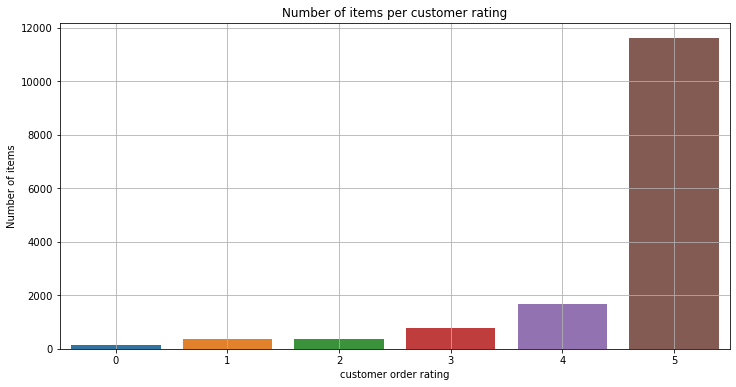

In [76]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="customer order rating",  data=df)
plt.title('Number of items per customer rating')
plt.ylabel('Number of items')
plt.grid()
plt.show()

#### Number of items per issue type

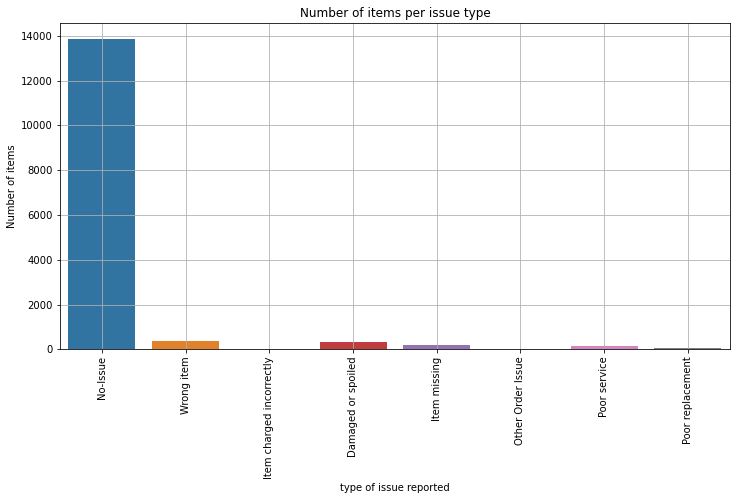

In [77]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="type of issue reported",  data=df)
plt.title('Number of items per issue type')
plt.ylabel('Number of items')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

##### Distribution of issues

In [78]:
data = df['type of issue reported'].value_counts()

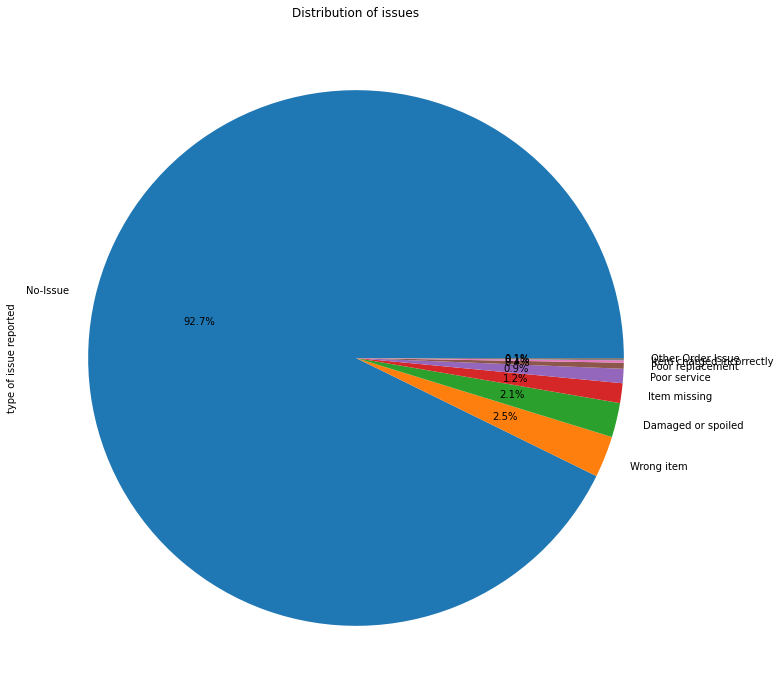

In [79]:
fig = plt.figure(figsize=(12,20))
data.plot.pie(autopct="%.1f%%");
plt.title('Distribution of issues')
plt.show()

#### Explore ratings by region and issues

In [80]:
df.region.unique()

array(['chi', 'nyc', 'sf', 'sf '], dtype=object)

In [81]:
#Remove whitespace from region name
df['region'] = df.region.replace('sf ', 'sf')

In [82]:
df.region.unique()

array(['chi', 'nyc', 'sf'], dtype=object)

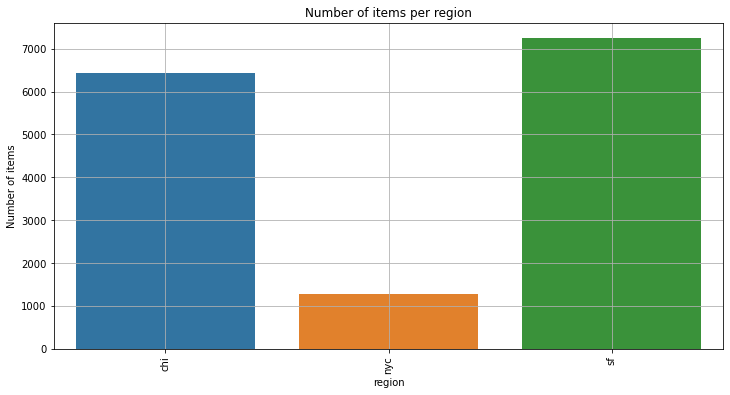

In [83]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="region",  data=df)
plt.title('Number of items per region')
plt.ylabel('Number of items')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [84]:
groupby = ['type of issue reported']
stats_table = TableOne(df,columns = ['region', 'customer order rating'],
                   groupby=groupby, pval=True, tukey_test=True)
stats_table.to_excel('region, issues and ratings.xlsx')
display(stats_table)

Grouped by type of issue reported                                                                                                                                                         
                                                           Missing       Overall Damaged or spoiled Item charged incorrectly Item missing      No-Issue Other Order Issue Poor replacement Poor service  Wrong item P-Value
n                                                                          14957                310                       21          178         13870                21               54          129         374        
region, n (%)                chi                                 0   6430 (43.0)         102 (32.9)                13 (61.9)    49 (27.5)   6158 (44.4)          7 (33.3)          4 (7.4)    15 (11.6)   82 (21.9)  <0.001
                             nyc                                      1290 (8.6)          53 (17.1)                 3 (14.3)     10 (5.6)    1168 (8.4)          4 (19.0)         9 (16.7)    15 (11.6)    28 (7.5)        
                             sf                                      7237 (48.4)         155 (50.0)                 5 (23.8)   119 (66.9)   6544 (47.2)         10 (47.6)        41 (75.9)    99 (76.7)  264 (70.6)        
customer order rating, n (%) 0                                   0     154 (1.0)            2 (0.6)                                           151 (1.1)                            1 (1.9)                           <0.001
                             1                                         373 (2.5)          49 (15.8)                  1 (4.8)    32 (18.0)     204 (1.5)          3 (14.3)        15 (27.8)    39 (30.2)    30 (8.0)        
                             2                                         370 (2.5)          52 (16.8)                  1 (4.8)    41 (23.0)     176 (1.3)           2 (9.5)         7 (13.0)    23 (17.8)   68 (18.2)        
                             3                                         778 (5.2)         103 (33.2)                             40 (22.5)     449 (3.2)          7 (33.3)        21 (38.9)    33 (25.6)  125 (33.4)        
                             4                                       1680 (11.2)          75 (24.2)                10 (47.6)    40 (22.5)   1395 (10.1)          6 (28.6)         8 (14.8)    26 (20.2)  120 (32.1)        
                             5                                      11602 (77.6)           29 (9.4)                 9 (42.9)    25 (14.0)  11495 (82.9)          3 (14.3)          2 (3.7)      8 (6.2)    31 (8.3)        
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: region, customer order rating.

#### Explore ratings by region

In [85]:
groupby = ['region']
stats_table = TableOne(df,columns = ['region', 'customer order rating'],
                   groupby=groupby, pval=True, tukey_test=True)
stats_table.to_excel('region and ratings.xlsx')
display(stats_table)

Grouped by region                                                            
                                         Missing       Overall          chi         nyc           sf P-Value
n                                                        14957         6430        1290         7237        
customer order rating, n (%) 0                 0     154 (1.0)     50 (0.8)     8 (0.6)     96 (1.3)  <0.001
                             1                       373 (2.5)     84 (1.3)    45 (3.5)    244 (3.4)        
                             2                       370 (2.5)     92 (1.4)    43 (3.3)    235 (3.2)        
                             3                       778 (5.2)    185 (2.9)    95 (7.4)    498 (6.9)        
                             4                     1680 (11.2)    621 (9.7)  195 (15.1)   864 (11.9)        
                             5                    11602 (77.6)  5398 (84.0)  904 (70.1)  5300 (73.2)

#### Explore number of items by hour of the day

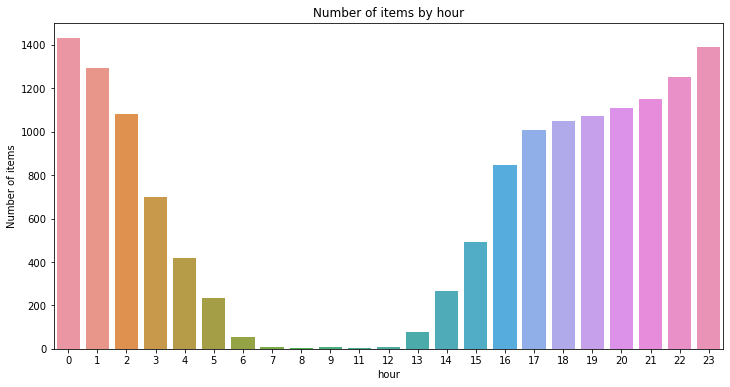

In [86]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="hour",  data=df)
plt.title('Number of items by hour')
plt.ylabel('Number of items')
plt.show()

##### Number of items per week of the year

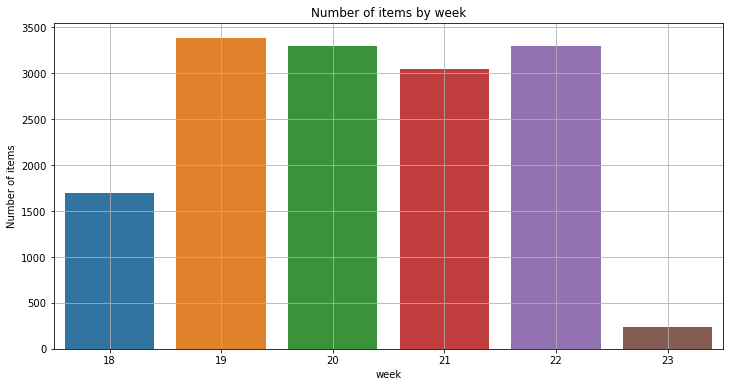

In [87]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="week",  data=df)
plt.grid()
plt.title('Number of items by week')
plt.ylabel('Number of items')
plt.show()

##### Number of items per day of the week

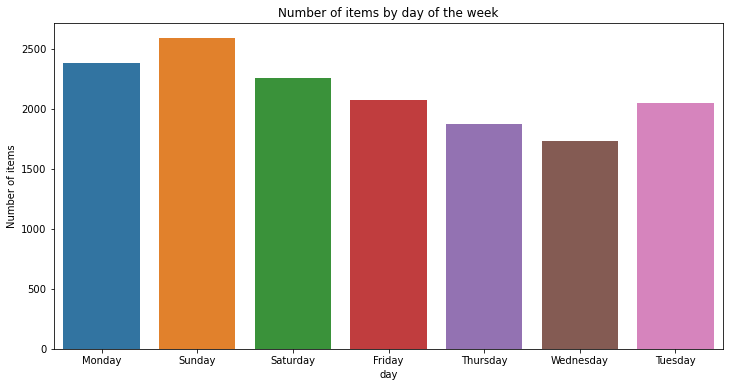

In [88]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="day",  data=df)
plt.title('Number of items by day of the week')
plt.ylabel('Number of items')
plt.show()

In [89]:
df['day'].value_counts()

Sunday       2588
Monday       2381
Saturday     2259
Friday       2072
Tuesday      2051
Thursday     1877
Wednesday    1729
Name: day, dtype: int64

In [90]:
df['week'].value_counts()

19    3382
22    3298
20    3296
21    3048
18    1694
23     239
Name: week, dtype: Int64

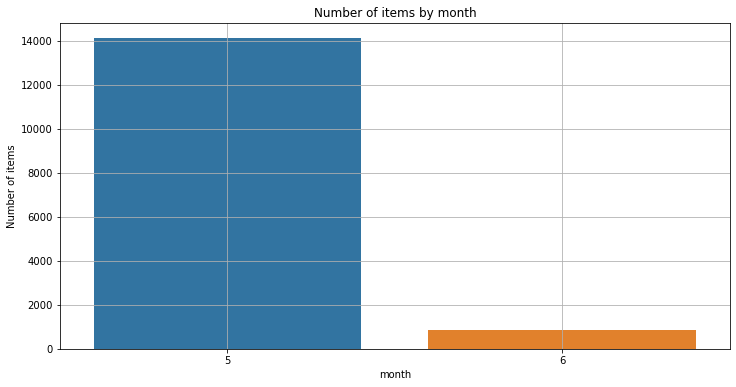

In [91]:
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="month",  data=df)
plt.title('Number of items by month')
plt.ylabel('Number of items')
plt.grid()
plt.show()

In [92]:
groupby = ['month']
stats_table = TableOne(df,columns = ['region', 'month'],
                   groupby=groupby, pval=True, tukey_test=True)
stats_table.to_excel('month and region.xlsx')
display(stats_table)

Grouped by month                                              
                           Missing      Overall            5           6 P-Value
n                                         14957        14119         838        
region, n (%) chi                0  6430 (43.0)  6055 (42.9)  375 (44.7)   0.002
              nyc                    1290 (8.6)   1246 (8.8)    44 (5.3)        
              sf                    7237 (48.4)  6818 (48.3)  419 (50.0)

##### Region and issues

In [93]:
groupby = ['region']
stats_table = TableOne(df,columns = ['region', 'type of issue reported'],
                   groupby=groupby, pval=True, tukey_test=True)
stats_table.to_excel('region and issues.xlsx')
display(stats_table)

Grouped by region                                                             
                                                                 Missing       Overall          chi          nyc           sf P-Value
n                                                                                14957         6430         1290         7237        
type of issue reported, n (%) Damaged or spoiled                       0     310 (2.1)    102 (1.6)     53 (4.1)    155 (2.1)  <0.001
                              Item charged incorrectly                        21 (0.1)     13 (0.2)      3 (0.2)      5 (0.1)        
                              Item missing                                   178 (1.2)     49 (0.8)     10 (0.8)    119 (1.6)        
                              No-Issue                                    13870 (92.7)  6158 (95.8)  1168 (90.5)  6544 (90.4)        
                              Other Order Issue                               21 (0.1)      7 (0.1)      4 (0.3)     10 (0.1)        
                              Poor replacement                                54 (0.4)      4 (0.1)      9 (0.7)     41 (0.6)        
                              Poor service                                   129 (0.9)     15 (0.2)     15 (1.2)     99 (1.4)        
                              Wrong item                                     374 (2.5)     82 (1.3)     28 (2.2)    264 (3.6)        
[1] Chi-squared tests for the following variables may be invalid due to the low number of observations: type of issue reported.

##### Region and day of the week

In [95]:
groupby = ['region']
stats_table = TableOne(df,columns = ['region', 'day'],
                   groupby=groupby, pval=True, tukey_test=True)
stats_table.to_excel('region and day.xlsx')
display(stats_table)

Grouped by region                                                           
                               Missing      Overall          chi         nyc           sf P-Value
n                                             14957         6430        1290         7237        
day, n (%) Friday                    0  2072 (13.9)   879 (13.7)  204 (15.8)   989 (13.7)   0.003
           Monday                       2381 (15.9)   996 (15.5)  204 (15.8)  1181 (16.3)        
           Saturday                     2259 (15.1)  1028 (16.0)  188 (14.6)  1043 (14.4)        
           Sunday                       2588 (17.3)  1172 (18.2)  183 (14.2)  1233 (17.0)        
           Thursday                     1877 (12.5)   769 (12.0)  177 (13.7)   931 (12.9)        
           Tuesday                      2051 (13.7)   882 (13.7)  172 (13.3)   997 (13.8)        
           Wednesday                    1729 (11.6)   704 (10.9)  162 (12.6)   863 (11.9)